In [16]:
import pandas as pd
df = pd.DataFrame(data={
                    'col1': [1,2,3,4]  ,
                    'col2': [('a', 'b'), ('a'), ('b', 'n', 'k'), ('a', 'c', 'k', 'z') ] ,
                    })

value_col = 'col1'
id_col = 'col2'

In [17]:
df

,col1,col2
0,1,"(a, b)"
1,2,a
2,3,"(b, n, k)"
3,4,"(a, c, k, z)"


In [18]:
df = df.join(df.col2.apply(lambda x: pd.Series(x)))

In [19]:
df

,col1,col2,0,1,2,3
0,1,"(a, b)",a,b,NaN,NaN
1,2,a,a,NaN,NaN,NaN
2,3,"(b, n, k)",b,n,k,NaN
3,4,"(a, c, k, z)",a,c,k,z


In [36]:
#this is everything that's in the first df.columns that's not in the parameters passed into the .difference method
dummy_cols = df.columns.difference(df[[value_col, id_col]].columns) #columns 0, 1, 2, 3 of above

# a | b is all a and b columns (combined)


dfd = pd.get_dummies(df[dummy_cols | pd.Index([value_col])]) 

In [39]:
pd.Index([value_col])

Index([u'col1'], dtype='object')

In [12]:
dfd

,col1,0_a,0_b,1_b,1_c,1_n,2_k,3_z
0,1,1,0,1,0,0,0,0
1,2,1,0,0,0,0,0,0
2,3,0,1,0,0,1,1,0
3,4,1,0,0,1,0,1,1


In [20]:
dfd2 = pd.melt(dfd, value_vars=dfd.columns.difference([value_col]).tolist(), id_vars=value_col)

In [22]:
dfd2.head()

,col1,variable,value
0,1,0_a,1
1,2,0_a,1
2,3,0_a,0
3,4,0_a,1
4,1,0_b,0


In [23]:
dfd2['variable'] = dfd2.variable.str.replace(r'\d_', '')

In [26]:
dfd2.head()

,col1,variable,value
0,1,a,1
1,2,a,1
2,3,a,0
3,4,a,1
4,1,b,0


In [41]:
dfd3 = dfd2[dfd2.value != 0].groupby('variable')[value_col].sum()

In [42]:
print dfd3.head()

variable
a           7
b           4
c           4
k           7
n           3
Name: col1, dtype: int64


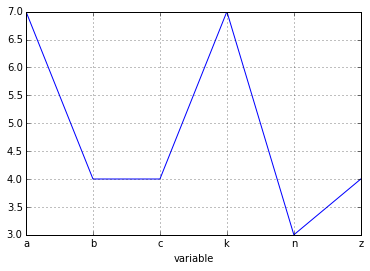

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

dfd3.plot()

In [ ]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html